<a href="https://colab.research.google.com/github/Kimp25/Clasificador-de-gastos/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import pickle
from google.colab import files
import matplotlib.pyplot as plt

¿Quieres clasificar gastos individuales (1) o desde un archivo CSV (2)? 2
Sube tu archivo CSV con los nuevos gastos...


Saving resultados_clasificacion (3).csv to resultados_clasificacion (3) (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Se ha guardado el archivo con las clasificaciones.


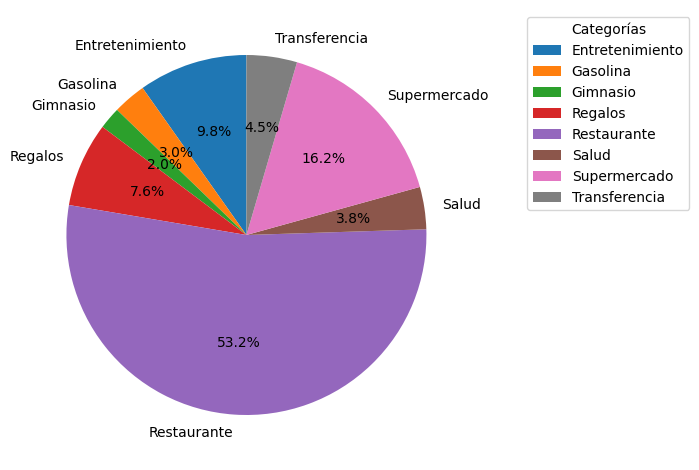

In [4]:
# Cargar archivos del modelo y vectorizadores desde rutas locales
with open('/content/modelo_gastos (2).pkl', 'rb') as f:
    clf = pickle.load(f)

with open('/content/count_vect (2).pkl', 'rb') as f:
    count_vect = pickle.load(f)

with open('/content/tfidf_transformer (2).pkl', 'rb') as f:
    tfidf_transformer = pickle.load(f)


def predecir_categoria(descripcion):
    # Transformar el texto usando el mismo pipeline
    X_new_counts = count_vect.transform([descripcion])
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)

    # Predecir
    prediccion = clf.predict(X_new_tfidf)
    return prediccion[0]

# Función para procesar archivo CSV
def procesar_csv(df):
    df['categoria_predicha'] = df['Map_Text'].apply(predecir_categoria)
    return df

# Interfaz
opcion = input("¿Quieres clasificar gastos individuales (1) o desde un archivo CSV (2)? ")

if opcion == "1":
    while True:
        descripcion = input("\nIngresa la descripción del gasto (o 'salir' para terminar): ")
        if descripcion.lower() == 'salir':
            break

        categoria = predecir_categoria(descripcion)
        print(f"\nCategoría predicha: {categoria}")

elif opcion == "2":
    print("Sube tu archivo CSV con los nuevos gastos...")
    uploaded = files.upload()
    filename = next(iter(uploaded))
    df = pd.read_csv(filename, encoding='latin-1')

    # Procesar y clasificar
    resultados = procesar_csv(df)

    # Guardar resultados
    resultados.to_csv('resultados_clasificacion.csv', index=False)
    files.download('resultados_clasificacion.csv')
    print("\nSe ha guardado el archivo con las clasificaciones.")

    # Generar el gráfico
    resumen_gastos = resultados.groupby('categoria_predicha')['Total_Expense'].sum()
    # Crear el gráfico circular
    plt.pie(resumen_gastos,
            labels=resumen_gastos.index,
            autopct='%1.1f%%',
            startangle=90)

    # Leyenda
    plt.legend(resumen_gastos.index,
               title="Categorías",
               loc="upper right",
               bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()
